In [30]:
#import all the necessary libraries

import pandas as pd
import numpy as np
import pandas as pd

# For Visualisation
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn import metrics

# To Scale our data
from sklearn.preprocessing import scale

# To perform KMeans clustering 
from sklearn.decomposition import IncrementalPCA
from sklearn.cluster import KMeans
from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster.hierarchy import cut_tree

from sklearn.model_selection import train_test_split


In [2]:
final_score = pd.read_csv('final_score.csv')

In [3]:
final_score

,Provider ID,radm_score,mort_score,safety_score,expe_score,medi_score,time_score,effe_score,final_score
0,10001,-0.309709,-0.627662,-0.120902,-0.227843,-0.049667,-0.626658,-0.124029,-0.298067
1,10005,0.547881,-0.246331,0.202535,-0.031616,-0.378802,-0.144562,0.246438,0.027935
2,10006,-0.168701,-0.553802,-0.419724,0.124587,-0.060915,-0.046349,-0.049492,-0.167771
3,10011,-0.190088,0.051718,-0.121613,-0.235509,0.260861,-0.235684,-0.797015,-0.181047
4,10012,0.298608,0.098717,0.323677,0.048671,0.260007,0.250186,0.079542,0.194201
5,10016,0.248827,-0.420800,0.109561,-0.282386,-0.721338,-0.421927,0.019839,-0.209746
6,10019,-0.564132,0.090211,0.697717,-0.144424,-0.500481,0.164844,-0.047200,-0.043352
7,10021,0.161845,-0.219291,-0.166125,0.016514,0.029103,0.314042,0.105945,0.034576
8,10023,-0.047022,-0.813730,0.427825,-0.247941,-0.090594,-0.114894,-0.158429,-0.149255
9,10024,0.198762,0.194529,0.316549,-0.032566,-0.117575,-0.331294,-0.384747,-0.022334


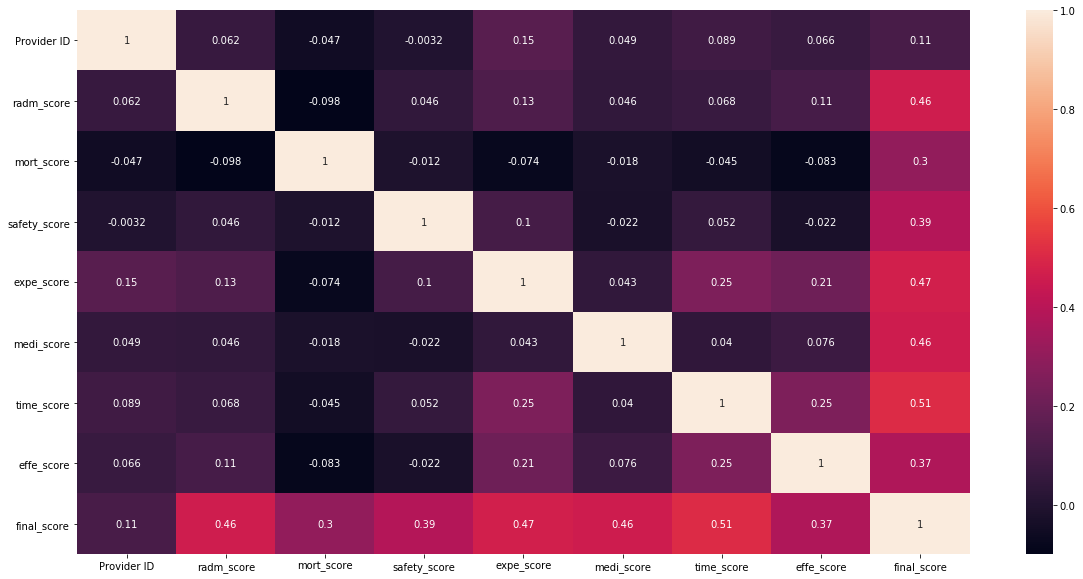

In [4]:
plt.figure(figsize = (20,10))
sns.heatmap(final_score.corr(), annot=True)

In [5]:
y=final_score['final_score']
X=final_score.drop(['Provider ID','final_score'],axis=1)

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X ,y,train_size=0.7,test_size=0.3,random_state=100)


### kmeans

In [12]:
cleaned_master_data=pd.read_csv('cleaned_master_data_py.csv')
cleaned_master_data.head()

,Unnamed: 0,Provider ID,MORT_30_AMI_score,MORT_30_COPD_score,MORT_30_HF_score,MORT_30_PN_score,MORT_30_STK_score,COMP_HIP_KNEE_score,HAI_1_SIR_score,HAI_2_SIR_score,...,OP_30_score,OP_4_score,PC_01_score,STK_6_score,STK_8_score,VTE_1_score,VTE_2_score,VTE_3_score,VTE_5_score,Hospital overall rating
0,0,10001,1.249515,-1.094132,-0.165556,0.427705,-0.282062,-1.355218,-2.351722,-2.088233,...,0.071075,0.368028,0.538880,0.446005,-0.570074,0.333841,0.381176,-0.277730,-0.253670,0
1,1,10005,-1.546065,0.434008,-2.286446,-2.103663,-0.342167,0.074474,-1.023215,0.050036,...,0.500302,0.545870,0.324044,-0.915528,0.618334,0.178342,-0.450362,0.819555,0.635329,0
2,2,10006,-2.105181,0.883461,-2.354862,-0.861860,-1.784684,-1.355218,0.389548,-0.357358,...,0.328611,0.368028,0.538880,0.198454,-0.295826,0.411590,-1.281900,-0.887332,-0.075870,1
3,3,10007,0.051410,-1.094132,-1.533872,-1.148430,-1.003320,0.074474,0.150495,1.054208,...,-3.448585,-1.232556,0.324044,-3.019716,0.344086,0.333841,0.381176,0.331873,0.457530,0
4,4,10008,0.051410,-0.105335,-0.370803,0.332182,0.078568,0.074474,0.150495,0.129313,...,0.714915,0.368028,0.324044,0.322230,0.344086,0.489340,0.381176,0.331873,0.457530,0


In [13]:
hspt_overall_rtng=pd.DataFrame(columns=['Provider ID','Hospital overall rating'], data=cleaned_master_data)

In [14]:
hspt_overall_rtng.head()

,Provider ID,Hospital overall rating
0,10001,0
1,10005,0
2,10006,1
3,10007,0
4,10008,0


In [15]:
result = pd.merge(final_score, hspt_overall_rtng, on='Provider ID')

In [16]:
result.head()

,Provider ID,radm_score,mort_score,safety_score,expe_score,medi_score,time_score,effe_score,final_score,Hospital overall rating
0,10001,-0.309709,-0.627662,-0.120902,-0.227843,-0.049667,-0.626658,-0.124029,-0.298067,0
1,10005,0.547881,-0.246331,0.202535,-0.031616,-0.378802,-0.144562,0.246438,0.027935,0
2,10006,-0.168701,-0.553802,-0.419724,0.124587,-0.060915,-0.046349,-0.049492,-0.167771,1
3,10011,-0.190088,0.051718,-0.121613,-0.235509,0.260861,-0.235684,-0.797015,-0.181047,1
4,10012,0.298608,0.098717,0.323677,0.048671,0.260007,0.250186,0.079542,0.194201,0


In [17]:
result['Hospital overall rating'].isna().sum()

0

In [18]:
y=result['Hospital overall rating']
X=result.drop(['Provider ID','Hospital overall rating'],axis=1)

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X ,y,train_size=0.7,test_size=0.3,random_state=100)


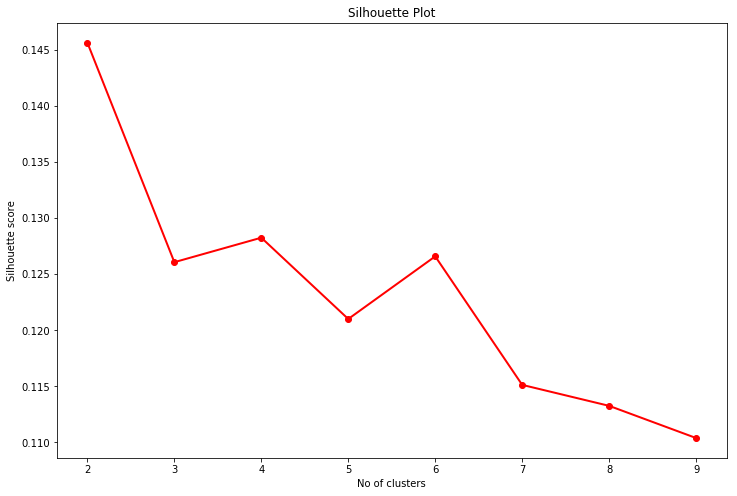

In [20]:
from sklearn.metrics import silhouette_score
sse_ = []
for k in range(2, 10):
    kmeans = KMeans(n_clusters=k).fit(X_train)
    sse_.append([k, silhouette_score(X_train, kmeans.labels_)])

    
fig = plt.figure(figsize = (12,8))
plt.plot(pd.DataFrame(sse_)[0], pd.DataFrame(sse_)[1], 'ro-', linewidth=2);
plt.title('Silhouette Plot')
plt.xlabel('No of clusters')
plt.ylabel('Silhouette score')
plt.show()

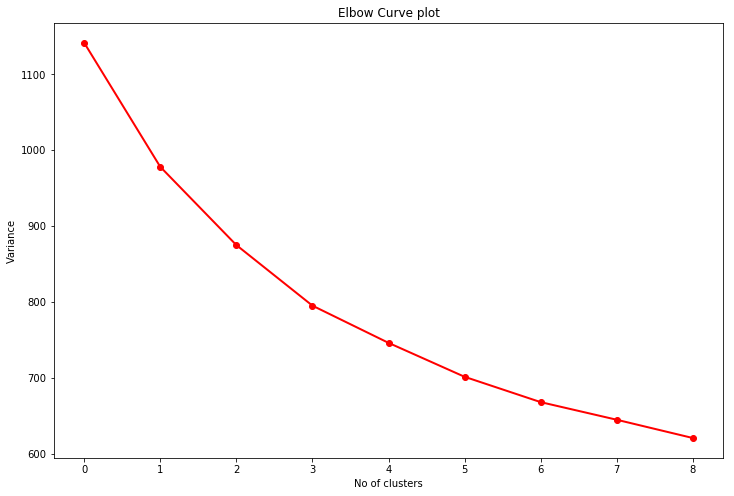

In [21]:
ssd = []
for num_clusters in list(range(1,10)):
    model_clus = KMeans(n_clusters = num_clusters, max_iter=50)
    model_clus.fit(X_train)
    ssd.append(model_clus.inertia_)

fig = plt.figure(figsize = (12,8))
plt.plot(ssd, 'ro-', linewidth=2);
plt.title('Elbow Curve plot')
plt.xlabel('No of clusters')
plt.ylabel('Variance')
plt.show()

In [25]:
kmeans_model = KMeans(n_clusters = 3, max_iter=200, random_state = 100)
kmeans_model.fit(X_train)


KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=200,
    n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=100, tol=0.0001, verbose=0)

In [26]:
y_pred= kmeans_model.predict(X_test)

In [27]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.2863070539419087


### Hierarchical Clustering

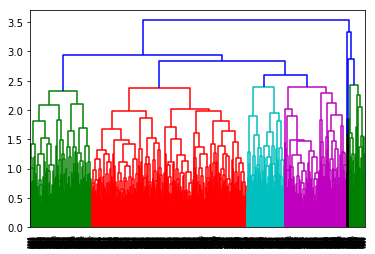

In [31]:
#We don't get good results here.
#Let's try complete linkage method
mergings = linkage(X, method = "complete", metric='euclidean')
dendrogram(mergings)
plt.show()

In [32]:
X_train.head()

,radm_score,mort_score,safety_score,expe_score,medi_score,time_score,effe_score,final_score
887,0.045857,0.093515,0.202438,0.022786,-0.285923,-0.117033,0.107377,0.009860
2322,0.329871,0.458943,-0.546411,-0.604444,0.267166,0.013361,-0.162891,-0.034915
670,-0.226191,0.100667,0.060110,-0.514293,-0.282392,-0.670701,-0.541886,-0.296384
2265,-0.475864,-0.169451,0.189043,0.150330,0.085102,-0.443691,-0.074447,-0.105568
2302,-0.635597,0.347055,-0.240538,0.084477,-0.237872,-0.294420,0.064390,-0.130358


In [33]:
#Okay now we are seeing some good clusters here. Let's see if they make sense if we eliminate the barriers
clusterCut = pd.Series(cut_tree(mergings, n_clusters = 3).reshape(-1,))
dat3_hc = pd.concat([X_train, clusterCut], axis=1)
dat3_hc.columns = ['radm_score','mort_score','safety_score','expe_score','medi_score','time_score','effe_score','final_score','ClusterID']

In [34]:
from sklearn.cluster import AgglomerativeClustering

In [35]:
cluster = AgglomerativeClustering(n_clusters=4, affinity='euclidean', linkage='ward')
cluster.fit(X_train)

AgglomerativeClustering(affinity='euclidean', compute_full_tree='auto',
            connectivity=None, linkage='ward', memory=None, n_clusters=4,
            pooling_func='deprecated')

In [36]:
y_pred=cluster.fit_predict(X_test)

In [37]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.31258644536652835
